Batch Gradient Descent:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
""" Generating data """
true_slops = 10.889
true_intercept = 3.456
input_var = np.arange(0.0, 100.0)
output_var = true_slops*input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

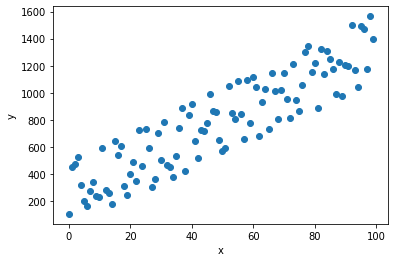

In [ ]:
#Matplotlib Notebook
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#Computing Cost Function
def compute_cost(input_var, output_var, theta):
    "Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_dash = np.dot(theta, np.array([1.0, x]))
        cost_sum += (y_dash - y) ** 2

    cost = cost_sum / (num_samples * 2.0)

    return cost

In [ ]:
#compute theta using batch gredient descent

def lin_reg_batch_gradient_descent(input_var, output_var, theta, alpha, max_iter):
    """Compute the params for linear regression using batch gradient descent"""
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    theta_store = np.zeros([2, max_iter])

    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, theta)
        theta_store[:, iteration] = theta

        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')

        for x,y in zip(input_var, output_var):
            y_dash = np.dot(theta, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_dash)
            theta += alpha * gradient/num_samples

        iteration += 1

    return theta, cost, theta_store

In [ ]:
#For checking some code
p = np.array([20, 80])
print(p)
p_s=np.zeros([2, 10])
print(p_s)
print("\n")
i=0
while i < 10:
  p_s[:, i] = p
  print(p_s)
  print("\n")
  i+=1
  #-------------------------------------------#

In [ ]:
"""Train the model"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

theta_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 1000
theta_dash_batch, cost_batch, theta_store_batch = lin_reg_batch_gradient_descent(x_train, y_train, theta_0, alpha_batch, max_iter)

Stochastic gradient descent

In [ ]:
def lin_reg_stoch_gradient_descent(input_var, output_var, theta, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    theta_store = np.zeros([2, num_samples])

    i = 0
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, theta)
        theta_store[:, i] = theta

        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')

        y_dash = np.dot(theta, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_dash)
        theta += alpha * gradient/num_samples

        i += 1

    return theta, cost, theta_store

In [ ]:
alpha = 1e-3
theta_0 = np.array([20.0, 80.0])
theta_dash, cost, theta_store = lin_reg_stoch_gradient_descent(x_train, y_train, theta_0, alpha)

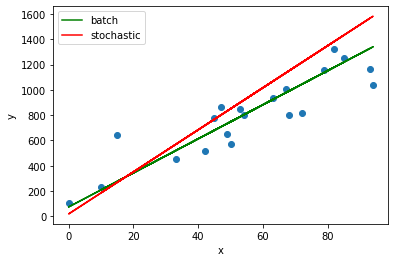

batch      T0, T1: 74.26918301790846, 13.471321464868238
stochastic T0, T1: 19.0284871633652, 16.631370578099208
batch rms:      151.48075878578513
stochastic rms: 242.26509365833724


In [ ]:
#visualizing gredient descent function
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, theta_dash_batch[0] + theta_dash_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, theta_dash[0] + theta_dash[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {theta_dash_batch[0]}, {theta_dash_batch[1]}')
print(f'stochastic T0, T1: {theta_dash[0]}, {theta_dash[1]}')
rms_batch = np.sqrt(np.mean(np.square(theta_dash_batch[0] + theta_dash_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(theta_dash[0] + theta_dash[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

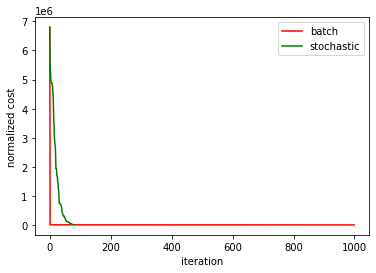

min cost with BGD: 17525.826513234468
min cost with SGD: 25235.822056907426


In [ ]:
#visualizing cost function

plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')